#**Features Engineering and Polynomial Regression**

Features Engineering creates new features from existing ones that could be more relevant in constructing a model.



In [7]:
import numpy as np
import matplotlib.pyplot as plt
from lab_utils_multi import gradient_descent, compute_cost, compute_gradient_matrix
np.set_printoptions(precision=2)

##**Feature Scaling**

This technique makes all features have a similar range so no single feature dominates the model.

In [2]:
def zscore_normalize_features(X):
  mean = np.mean(X,axis=0)
  std = np.std(X,axis=0)
  X_norm = (X-mean)/std

  return X_norm


**Gradient Descent for Engineered features**

In [3]:
def run_gradient_descent_feng(X,y,iterations=1000,alpha=1e-6):
  m,n = X.shape

  initial_w = np.zeros(n)
  initial_b = 0

  w_out, b_out, hist_out = gradient_descent(X ,y, initial_w, initial_b, compute_cost, compute_gradient_matrix, alpha, iterations)
  print(f"w,b found by gradient descent: w: {w_out}, b: {b_out:0.4f}")

  return(w_out, b_out)

In [4]:
x = np.arange(0,20,1)
X = np.c_[x, x**2, x**3]
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X,axis=0)}")

X = zscore_normalize_features(X)
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X,axis=0)}")

Peak to Peak range by column in Raw        X:[  19  361 6859]
Peak to Peak range by column in Normalized X:[3.3  3.18 3.28]


Iteration         0, Cost: 9.42147e+03
Iteration     10000, Cost: 3.90938e-01
Iteration     20000, Cost: 2.78389e-02
Iteration     30000, Cost: 1.98242e-03
Iteration     40000, Cost: 1.41169e-04
Iteration     50000, Cost: 1.00527e-05
Iteration     60000, Cost: 7.15855e-07
Iteration     70000, Cost: 5.09763e-08
Iteration     80000, Cost: 3.63004e-09
Iteration     90000, Cost: 2.58497e-10
w,b found by gradient descent: w: [5.27e-05 1.13e+02 8.43e-05], b: 123.5000


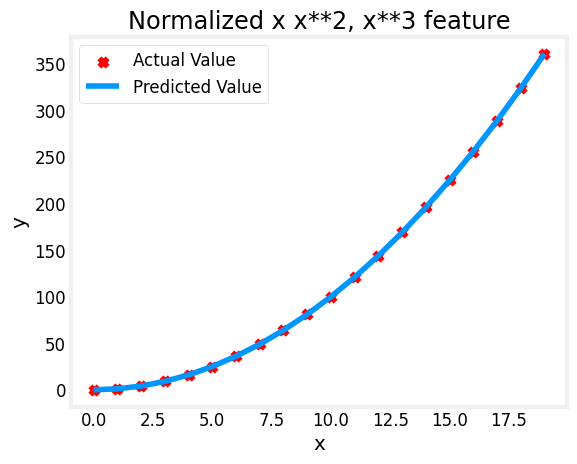

In [8]:
x = np.arange(0,20,1)
y = x**2

X = np.c_[x, x**2, x**3]
X = zscore_normalize_features(X)

model_w, model_b = run_gradient_descent_feng(X, y, iterations=100000, alpha=1e-1)

plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("Normalized x x**2, x**3 feature")
plt.plot(x,X@model_w + model_b, label="Predicted Value"); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()